In [5]:
import pandas as pd
import torch
import pickle
from transformers import AutoTokenizer, AutoModel
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from tqdm import tqdm

In [8]:
from sentence_transformers import SentenceTransformer
sentences = ["This is an example sentence", "Each sentence is converted"]

model = SentenceTransformer("neuml/pubmedbert-base-embeddings")
embeddings = model.encode(sentences)
print(embeddings)
print(embeddings.shape)

[[-0.54902196 -0.00991792 -0.26375914 ... -0.15789188 -1.299806
   0.8093479 ]
 [-1.0420794   0.78970575  0.5180285  ... -0.5906363  -1.081934
   0.50429827]]
(2, 768)


In [9]:
%%time
data = pd.read_csv('20K_test_set.csv')
model = SentenceTransformer("neuml/pubmedbert-base-embeddings")

test_embeddings_pubmedBERT = model.encode(data['Sentence'].tolist(), convert_to_tensor=False)
print(test_embeddings_pubmedBERT.shape)

(202426, 768)
CPU times: user 9min 23s, sys: 3min 22s, total: 12min 46s
Wall time: 9min 53s


In [10]:
%%time
with open('test_embeddings_pubmedBERT.pkl', 'wb') as f:
    pickle.dump(test_embeddings_pubmedBERT, f)

CPU times: user 44.2 ms, sys: 479 ms, total: 523 ms
Wall time: 774 ms


In [11]:
with open('test_embeddings_pubmedBERT.pkl', 'rb') as f:
    test_embeddings_pubmedBERT = pickle.load(f)

print("First embedding:", test_embeddings_pubmedBERT[0])
print("Shape/Length of first embedding:", len(test_embeddings_pubmedBERT[0]))

First embedding: [ 2.42243826e-01 -2.62623280e-01 -4.07765895e-01 -5.25262594e-01
  2.15617046e-01 -7.04182610e-02 -2.38883898e-01  3.25810879e-01
 -1.47608861e-01  2.45968118e-01  3.24656636e-01  1.90563187e-01
 -8.95278081e-02 -3.51480544e-01 -2.97059789e-02  2.43477851e-01
  1.51693061e-01  1.86190441e-01  5.57930946e-01 -2.25284901e-02
  4.12945390e-01 -3.06016237e-01  1.63932413e-01 -4.20267880e-01
  3.62491049e-02  8.85945678e-01 -4.76386920e-02 -2.02352896e-01
 -9.59504664e-01 -6.93948790e-02 -7.35459566e-01  3.19327489e-02
 -1.84042379e-02 -5.61357379e-01  4.26435620e-01  7.68451035e-01
 -9.42455292e-01 -6.26897573e-01 -5.65786302e-01 -5.42676926e-01
 -7.35536218e-01 -3.69397640e-01 -3.52655560e-01  4.75982070e-01
  4.94909257e-01  4.59176511e-01 -3.63900542e-01  2.77565777e-01
  1.23288617e-01 -6.07982576e-01 -5.13965666e-01  1.15153708e-01
 -6.67984724e-01  2.67887395e-02 -5.98784760e-02  3.61571252e-01
  2.03046471e-01 -3.02087665e-01 -2.13629961e-01  9.50287282e-02
  2.2680

### NOTE: It takes almost 2 Hours to Generate embedding for Train dataset.

In [12]:
%%time
data = pd.read_csv('200K_train_set.csv')
model = SentenceTransformer("neuml/pubmedbert-base-embeddings")

train_embeddings_pubmedBERT = model.encode(data['Sentence'].tolist(), convert_to_tensor=False)
print(train_embeddings_pubmedBERT.shape)

(2019273, 768)
CPU times: user 1h 34min 1s, sys: 35min 8s, total: 2h 9min 9s
Wall time: 1h 39min 49s


In [13]:
%%time
with open('train_embeddings_pubmedBERT.pkl', 'wb') as f:
    pickle.dump(train_embeddings_pubmedBERT, f)

CPU times: user 384 ms, sys: 3.61 s, total: 4 s
Wall time: 4.01 s


In [14]:
with open('train_embeddings_pubmedBERT.pkl', 'rb') as f:
    train_embeddings_pubmedBERT = pickle.load(f)

print("First embedding:", train_embeddings_pubmedBERT[0])
print("Shape/Length of first embedding:", len(train_embeddings_pubmedBERT[0]))

First embedding: [ 2.02333152e-01 -1.45948857e-01  1.82169512e-01 -5.45091808e-01
 -3.46068025e-01 -1.47204325e-01 -6.21767268e-02  5.14648080e-01
  2.33108416e-01  2.34367430e-01 -2.15997159e-01  2.16144741e-01
 -4.98952568e-01 -2.50786990e-01 -2.53949821e-01 -2.13582069e-04
  6.02323174e-01 -1.97661653e-01 -4.64103483e-02  3.00900906e-01
 -3.96740735e-01  4.10978645e-01 -3.08655918e-01 -2.45989561e-01
 -4.13137496e-01  3.02761137e-01 -8.53490114e-01 -3.93596530e-01
 -3.71887505e-01  6.98513612e-02 -5.43343544e-01  6.32291138e-01
 -3.58455867e-01 -7.16915011e-01 -5.70467450e-02 -7.44538248e-01
 -1.02488971e+00  4.16618884e-01  1.33418515e-02  4.23582733e-01
 -7.21712232e-01  1.03900719e+00  4.81347233e-01 -8.51287879e-03
 -3.63281220e-01  4.68471706e-01  7.53225014e-02  2.43377268e-01
  2.34365821e-01 -1.75057903e-01 -4.17028427e-01 -1.70248989e-02
 -1.17778860e-01  2.98318952e-01 -7.11985111e-01 -3.15193951e-01
 -2.37578765e-01  2.09034607e-02  1.09561026e-01 -1.68778405e-01
 -1.8421

In [15]:
# Load embeddings and labels
def load_data(embeddings_path, data_path):
    with open(embeddings_path, 'rb') as f:
        embeddings = pickle.load(f)
    data = pd.read_csv(data_path)
    labels = data['Label']
    return embeddings, labels

In [18]:
%%time

# Paths to your datasets and embeddings
train_path = '200K_train_set.csv'
test_path = '20K_test_set.csv'
train_embeddings_path = 'train_embeddings_pubmedBERT.pkl'
test_embeddings_path = 'test_embeddings_pubmedBERT.pkl'

# Load data
train_embeddings, train_labels = load_data(train_embeddings_path, '200K_train_set.csv')
test_embeddings, test_labels = load_data(test_embeddings_path, '20K_test_set.csv')

CPU times: user 3.27 s, sys: 1.39 s, total: 4.66 s
Wall time: 4.67 s


In [ ]:
# # Initialize tokenizer and model
# tokenizer = AutoTokenizer.from_pretrained("neuml/pubmedbert-base-embeddings")
# model = AutoModel.from_pretrained("neuml/pubmedbert-base-embeddings")

In [19]:
%%time
# Initialize and train logistic regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(train_embeddings, train_labels)

CPU times: user 2h 39min 47s, sys: 1h 32min 46s, total: 4h 12min 33s
Wall time: 9min 7s


LogisticRegression(max_iter=1000)

In [24]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pickle
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_auc_score, average_precision_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

In [22]:
%%time
# Evaluate on the test set
test_pred = lr_model.predict(test_embeddings)
print("Test Set Evaluation:")
print("Classification Report:\n", classification_report(test_labels, test_pred))
print("Confusion Matrix:\n", confusion_matrix(test_labels, test_pred))

Test Set Evaluation:
Classification Report:
               precision    recall  f1-score   support

  BACKGROUND       0.52      0.38      0.44     11287
 CONCLUSIONS       0.76      0.79      0.78     39638
     METHODS       0.86      0.88      0.87     59662
   OBJECTIVE       0.59      0.43      0.49      8821
     RESULTS       0.85      0.86      0.86     83018

    accuracy                           0.81    202426
   macro avg       0.71      0.67      0.69    202426
weighted avg       0.80      0.81      0.81    202426

Confusion Matrix:
 [[ 4328  3111  1156  1896   796]
 [ 1182 31493   645   188  6130]
 [  298   651 52584   450  5679]
 [ 1795  1502  1307  3782   435]
 [  783  4572  5731   147 71785]]
CPU times: user 7.38 s, sys: 3.37 s, total: 10.8 s
Wall time: 5.39 s


In [25]:
# Calculate sentence-level F1 Score
sentence_f1 = f1_score(test_labels, test_pred, average='macro')
print(f'Sentence-level F1 Score: {sentence_f1:.3f}')

Sentence-level F1 Score: 0.687


In [27]:
classes = np.unique(test_labels)
test_labels_binarized = label_binarize(test_labels, classes=classes)
test_prob = lr_model.predict_proba(test_embeddings)

# Calculate AUC scores
roc_auc = roc_auc_score(test_labels_binarized, test_prob, multi_class='ovr', average="weighted")
pr_auc = average_precision_score(test_labels_binarized, test_prob, average="weighted")
print(f'AUC-ROC: {roc_auc:.3f}, AUC-PR: {pr_auc:.3f}')

AUC-ROC: 0.950, AUC-PR: 0.863


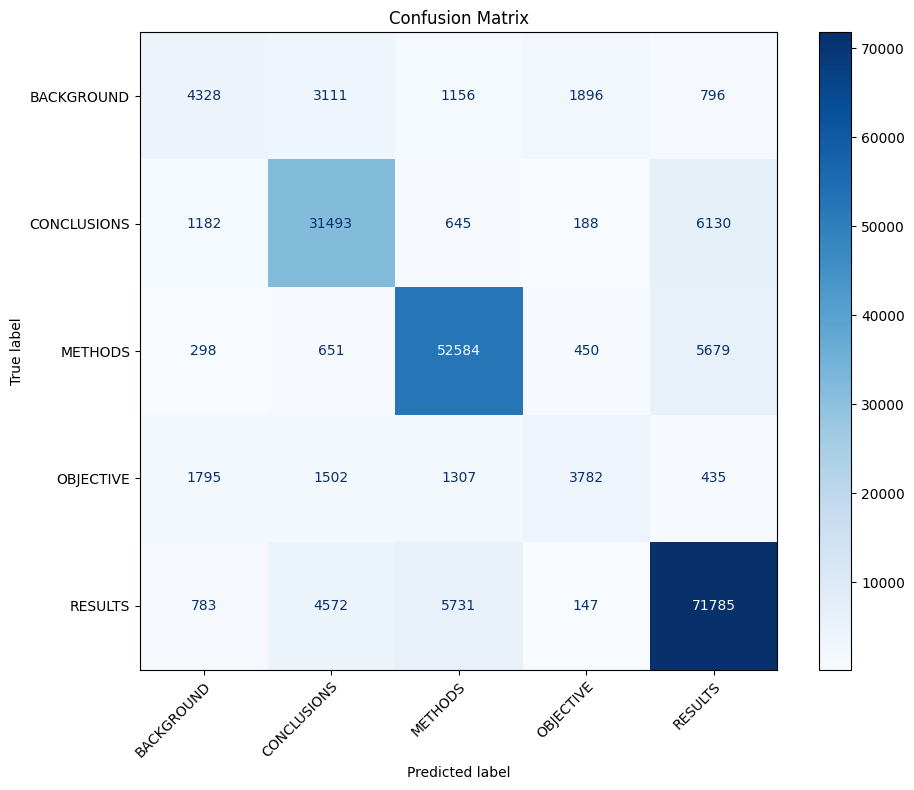

In [28]:
# Confusion matrix calculation and display
cm = confusion_matrix(test_labels, test_pred, labels=classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
fig, ax = plt.subplots(figsize=(10, 8))
disp.plot(cmap='Blues', ax=ax)
ax.set_title('Confusion Matrix')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor", fontsize=10)
plt.tight_layout()
plt.show()

In [29]:
# Print classification report
print(classification_report(test_labels, test_pred, target_names=classes))

              precision    recall  f1-score   support

  BACKGROUND       0.52      0.38      0.44     11287
 CONCLUSIONS       0.76      0.79      0.78     39638
     METHODS       0.86      0.88      0.87     59662
   OBJECTIVE       0.59      0.43      0.49      8821
     RESULTS       0.85      0.86      0.86     83018

    accuracy                           0.81    202426
   macro avg       0.71      0.67      0.69    202426
weighted avg       0.80      0.81      0.81    202426



### Train SVM

In [30]:
from sklearn.linear_model import SGDClassifier

sgd_model = SGDClassifier(loss='hinge', max_iter=1000, tol=1e-3, random_state=42)


In [31]:
%%time
sgd_model.fit(train_embeddings, train_labels)

CPU times: user 2min 17s, sys: 371 ms, total: 2min 18s
Wall time: 2min 18s


SGDClassifier(random_state=42)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [32]:
%%time
# Predict labels for the test set
test_pred = sgd_model.predict(test_embeddings)



CPU times: user 987 ms, sys: 649 ms, total: 1.64 s
Wall time: 112 ms


Classification Report for SGD Classifier:
               precision    recall  f1-score   support

  BACKGROUND       0.53      0.21      0.31     11287
 CONCLUSIONS       0.73      0.79      0.76     39638
     METHODS       0.84      0.88      0.86     59662
   OBJECTIVE       0.54      0.40      0.46      8821
     RESULTS       0.84      0.87      0.85     83018

    accuracy                           0.80    202426
   macro avg       0.70      0.63      0.65    202426
weighted avg       0.79      0.80      0.79    202426



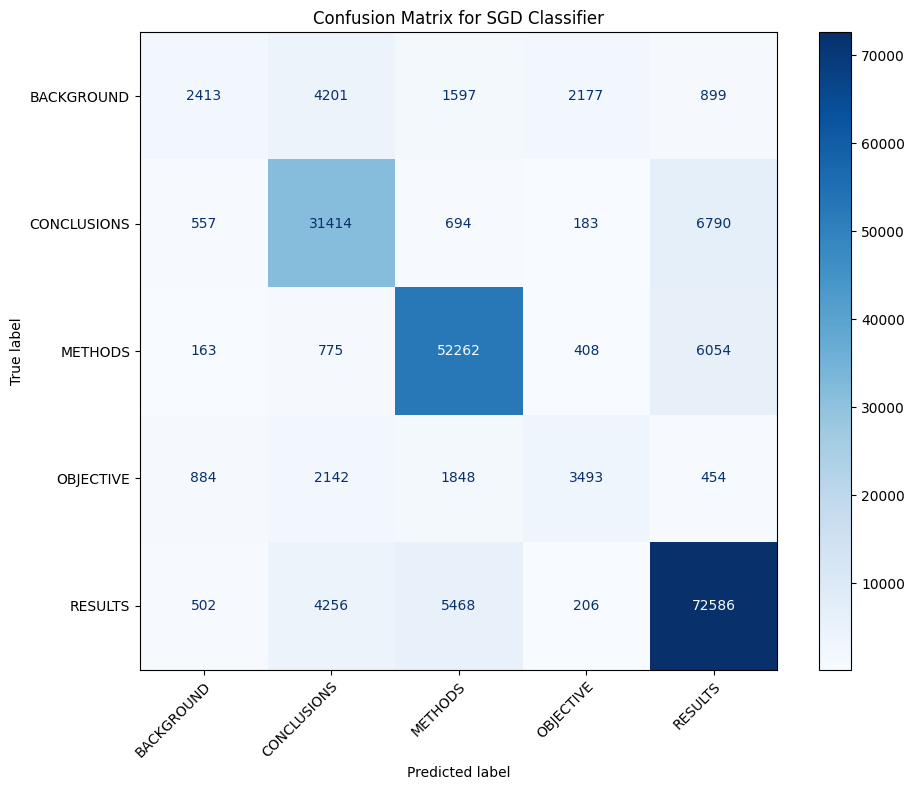

In [33]:

# Evaluation metrics
print("Classification Report for SGD Classifier:\n", classification_report(test_labels, test_pred))
cm = confusion_matrix(test_labels, test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(test_labels))
fig, ax = plt.subplots(figsize=(10, 8))
disp.plot(cmap='Blues', ax=ax)
ax.set_title('Confusion Matrix for SGD Classifier')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor", fontsize=10)
plt.tight_layout()
plt.show()

In [34]:
# Calculate sentence-level F1 Score
sentence_f1 = f1_score(test_labels, test_pred, average='macro')
print(f'Sentence-level F1 Score: {sentence_f1:.3f}')

Sentence-level F1 Score: 0.648


In [35]:
classes = np.unique(test_labels)
test_labels_binarized = label_binarize(test_labels, classes=classes)

# Calculate AUC scores
roc_auc = roc_auc_score(test_labels_binarized, test_prob, multi_class='ovr', average="weighted")
pr_auc = average_precision_score(test_labels_binarized, test_prob, average="weighted")
print(f'AUC-ROC: {roc_auc:.3f}, AUC-PR: {pr_auc:.3f}')

AUC-ROC: 0.950, AUC-PR: 0.863


In [36]:
# Print classification report
print(classification_report(test_labels, test_pred, target_names=classes))

              precision    recall  f1-score   support

  BACKGROUND       0.53      0.21      0.31     11287
 CONCLUSIONS       0.73      0.79      0.76     39638
     METHODS       0.84      0.88      0.86     59662
   OBJECTIVE       0.54      0.40      0.46      8821
     RESULTS       0.84      0.87      0.85     83018

    accuracy                           0.80    202426
   macro avg       0.70      0.63      0.65    202426
weighted avg       0.79      0.80      0.79    202426

